In [36]:
import numpy as nm
import matplotlib.pyplot as mtp 
import pandas as pd 


In [37]:
data_set = pd.read_csv("datasets/Mall_Customers.csv")

In [38]:
x= data_set.iloc[:,[2,3]].values
y = data_set.iloc[:,4].values

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.25,random_state = 0)


In [41]:
x_train

array([[ 27, 255],
       [ 32,  97],
       [ 59, 255],
       [ 18,  33],
       [ 44, 155],
       [ 31,  70],
       [ 52, 240],
       [ 47, 278],
       [ 56, 190],
       [ 40,  87],
       [ 35,  21],
       [ 48,  77],
       [ 66,  63],
       [ 30, 292],
       [ 31,  17],
       [ 32, 222],
       [ 19,  46],
       [ 23,  70],
       [ 31,  43],
       [ 43,  48],
       [ 45,  28],
       [ 66,  63],
       [ 27, 288],
       [ 36, 234],
       [ 65,  38],
       [ 24,  20],
       [ 23,  16],
       [ 34, 296],
       [ 54,  28],
       [ 60,  30],
       [ 36, 238],
       [ 70,  46],
       [ 51,  44],
       [ 32,  73],
       [ 38,  71],
       [ 35,  23],
       [ 28, 101],
       [ 20,  73],
       [ 50,  43],
       [ 43, 140],
       [ 57,  54],
       [ 33,  42],
       [ 20,  16],
       [ 31, 325],
       [ 49,  62],
       [ 41,  99],
       [ 55,  57],
       [ 67,  19],
       [ 36,  87],
       [ 59,  93],
       [ 29, 267],
       [ 24,  38],
       [ 37,

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)


In [44]:
x_train

array([[-0.76895498,  1.90031564],
       [-0.3828256 , -0.03311156],
       [ 1.70227306,  1.90031564],
       [-1.46398787, -0.81627195],
       [ 0.54388492,  0.67662754],
       [-0.46005148, -0.36350735],
       [ 1.16169193,  1.71676243],
       [ 0.77556254,  2.1817639 ],
       [ 1.47059543,  1.10491837],
       [ 0.23498141, -0.15548037],
       [-0.15114797, -0.96311452],
       [ 0.85278842, -0.27784918],
       [ 2.2428542 , -0.44916552],
       [-0.53727735,  2.35308024],
       [-0.46005148, -1.01206204],
       [-0.3828256 ,  1.49649857],
       [-1.38676199, -0.65719249],
       [-1.07785849, -0.36350735],
       [-0.46005148, -0.69390314],
       [ 0.46665904, -0.63271873],
       [ 0.62111079, -0.87745635],
       [ 2.2428542 , -0.44916552],
       [-0.76895498,  2.30413271],
       [-0.0739221 ,  1.64334114],
       [ 2.16562832, -0.75508754],
       [-1.00063261, -0.9753514 ],
       [-1.07785849, -1.02429892],
       [-0.22837385,  2.40202776],
       [ 1.31614368,

In [45]:
from sklearn.linear_model import LogisticRegression


In [46]:
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [47]:
LogisticRegression(C=1.0,class_weight=None, dual=False,fit_intercept=True,intercept_scaling=1,
                   l1_ratio=None,max_iter=100,multi_class='warn',n_jobs=None,penalty='l2',random_state=0,
                   solver='warn',tol=0.0001,verbose=0,warm_start=False)


LogisticRegression(multi_class='warn', random_state=0, solver='warn')

In [48]:
y_pred = classifier.predict(x_test)


In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

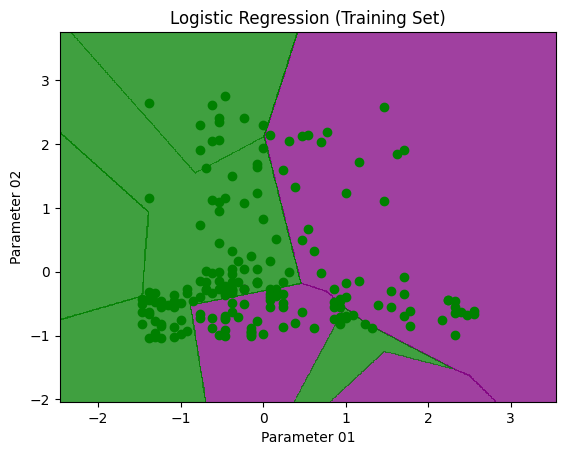

In [50]:
from matplotlib.colors import ListedColormap
x_set,y_set = x_train,y_train

x1,x2 = nm.meshgrid(nm.arange(start = x_set[:,0].min() - 1, stop = x_set[:,0].max()+ 1, step = 0.01),
nm.arange(start = x_set[:,1].min() - 1,stop = x_set[:,1].max() + 1, step = 0.01))

mtp.contourf(x1,x2,classifier.predict(nm.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75,cmap = ListedColormap(('purple','green')))

mtp.xlim(x1.min(),x1.max())
mtp.ylim(x2.min(),x2.max())

for i,j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j,0], x_set[y_set == j,1],
                color = ListedColormap(('purple','green'))(i),label = j)
    

mtp.title("Logistic Regression (Training Set)")
mtp.xlabel("Parameter 01")
mtp.ylabel("Parameter 02")
mtp.show()


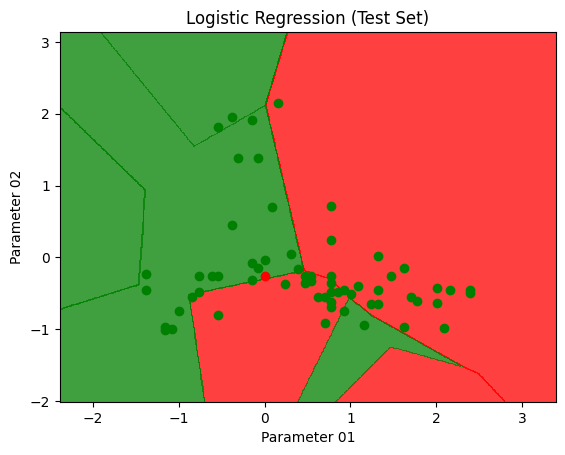

In [52]:
x_set,y_set = x_test,y_test

x1,x2 = nm.meshgrid(nm.arange(start = x_set[:,0].min() - 1,stop = x_set[:,0].max() + 1, step = 0.01),
                    nm.arange(start = x_set[:,1].min() - 1, stop = x_set[:,1].max() + 1,step = 0.01))

mtp.contourf(x1,x2,classifier.predict(nm.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75,cmap = ListedColormap(('red','green')))

mtp.xlim(x1.min(),x1.max())
mtp.ylim(x2.min(),x2.max())

for i, j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j,0],x_set[y_set == j,1],
                color = ListedColormap(('red','green'))(i),label = j)
    
mtp.title("Logistic Regression (Test Set)")
mtp.xlabel("Parameter 01")
mtp.ylabel("Parameter 02")
mtp.show()
